In [2]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Setup the Pose function for videos - for video processing.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7,
                          min_tracking_confidence=0.7)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils


In [10]:
path = './men.jpg'
image_pose = cv2.imread(path)
image_height, image_width, _ = image_pose.shape
print(image_height, image_width)

1400 1200


427 220 340 1022


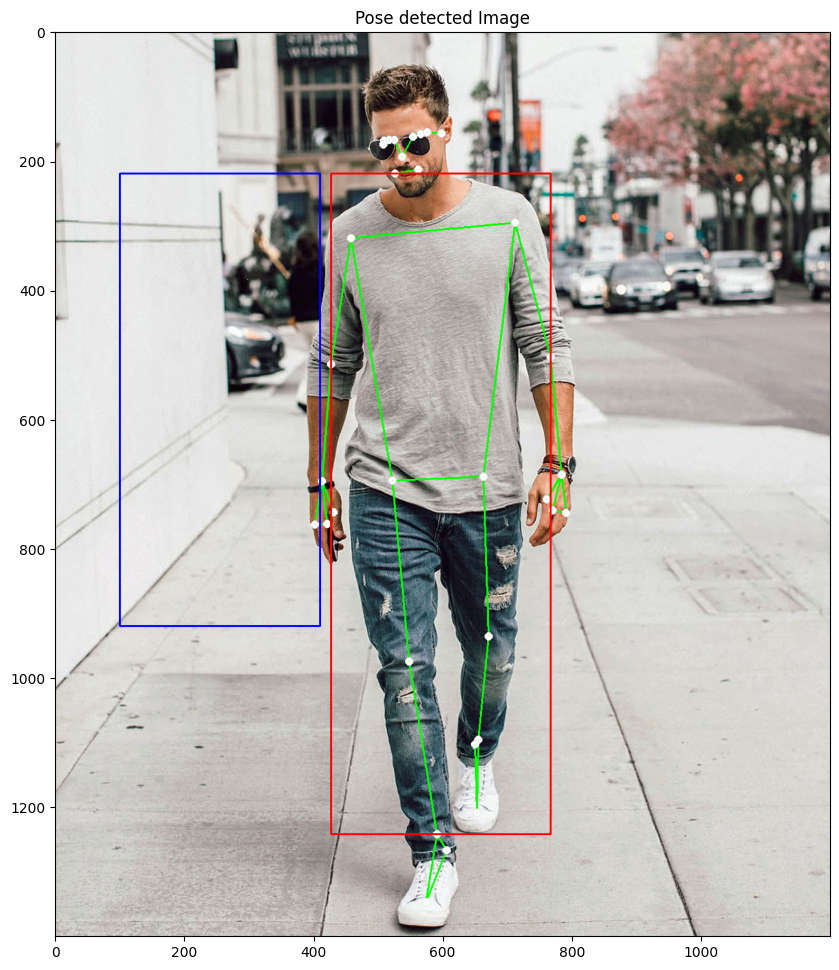

In [11]:
original_image = image_pose.copy()

image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)

results = pose_image .process(image_in_RGB)

MOUTH_RIGHT_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.MOUTH_RIGHT].x * image_width
MOUTH_RIGHT_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.MOUTH_RIGHT].y * image_height

LEFT_ANKLE_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * image_height

RIGHT_ANKLE_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y * image_height

LEFT_ELBOW_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * image_width
LEFT_ELBOW_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * image_height

RIGHT_ELBOW_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x * image_width
RIGHT_ELBOW_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y * image_height

RIGHT_SHOULDER_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
RIGHT_SHOULDER_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height

LEFT_SHOULDER_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * image_width
LEFT_SHOULDER_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_height

LEFT_HIP_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * image_width
LEFT_HIP_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * image_height

RIGHT_HIP_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * image_width
RIGHT_HIP_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * image_height

STARTING_X = int(RIGHT_ELBOW_X)
STARTING_Y = int(MOUTH_RIGHT_Y)
STARTING_WIDTH = int(LEFT_ELBOW_X) - int(RIGHT_ELBOW_X)
STARTING_HEIGHT = int(max(RIGHT_ANKLE_Y, LEFT_ANKLE_Y)) - int(STARTING_Y)

print(STARTING_X, STARTING_Y, STARTING_WIDTH, STARTING_HEIGHT)

mp_drawing.draw_landmarks(image=original_image, landmark_list=results.pose_landmarks,
						connections=mp_pose.POSE_CONNECTIONS,
						landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255),
																	thickness=3, circle_radius=3),
						connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0),
																		thickness=2, circle_radius=2))
#90, 220, 320, 700
cv2.rectangle(original_image, (STARTING_X, STARTING_Y), (STARTING_X + STARTING_WIDTH, STARTING_Y + STARTING_HEIGHT), (0, 0, 255), 2)
cv2.rectangle(original_image, (100, 220), (90 + 320, 220 + 700), (255, 0, 0), 2)


plt.figure(figsize=[22, 22])
plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('on');

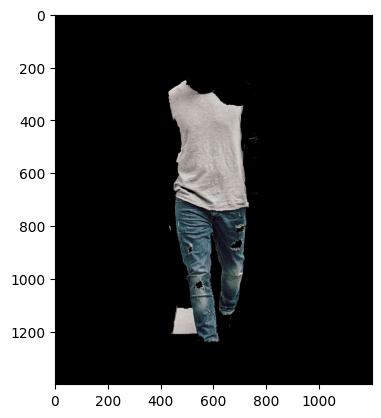

(<matplotlib.image.AxesImage at 0x18813ee2380>, None)

In [12]:
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = np.zeros(img.shape[:2],np.uint8)
img.shape

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)


#100, 220, 320, 700
rect = (STARTING_X, STARTING_Y, STARTING_WIDTH, STARTING_HEIGHT)

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.grabCut(img,mask, rect,bgdModel, fgdModel, 5,cv2.GC_INIT_WITH_RECT)
            
mask2 = np.where((mask==2) | (mask==0),0,1).astype('uint8')
img = img*mask2[:, :,np.newaxis ]
plt.imshow(img),plt.show()

In [1]:
mpDraw = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

pose_video = mp_pose.Pose()



cap = cv2.VideoCapture(0)

while True:
    output, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose_video.process(imgRGB)

    MOUTH_RIGHT_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.MOUTH_RIGHT].x * image_width
    MOUTH_RIGHT_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.MOUTH_RIGHT].y * image_height

    LEFT_ANKLE_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * image_height
    
    RIGHT_ANKLE_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y * image_height

    LEFT_ELBOW_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * image_width
    LEFT_ELBOW_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * image_height

    RIGHT_ELBOW_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x * image_width
    RIGHT_ELBOW_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y * image_height

    RIGHT_SHOULDER_X = results.pose_landmarks.landmark[
        mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
    RIGHT_SHOULDER_Y = results.pose_landmarks.landmark[
        mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height

    LEFT_SHOULDER_X = results.pose_landmarks.landmark[
        mp_pose.PoseLandmark.LEFT_SHOULDER].x * image_width
    LEFT_SHOULDER_Y = results.pose_landmarks.landmark[
        mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_height

    LEFT_HIP_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * image_width
    LEFT_HIP_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * image_height

    RIGHT_HIP_X = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * image_width
    RIGHT_HIP_Y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * image_height

    STARTING_X = int(RIGHT_ELBOW_X)
    STARTING_Y = int(MOUTH_RIGHT_Y)
    STARTING_WIDTH = int(LEFT_ELBOW_X) - int(RIGHT_ELBOW_X)
    STARTING_HEIGHT = int(max(RIGHT_ANKLE_Y, LEFT_ANKLE_Y)) - int(STARTING_Y)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=img, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 255, 255),
                                                                               thickness=3, circle_radius=3),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0),
                                                                                 thickness=2, circle_radius=2))
        #90, 220, 320, 700
        cv2.rectangle(img, (STARTING_X, STARTING_Y), (STARTING_X +
                      STARTING_WIDTH, STARTING_Y + STARTING_HEIGHT), (0, 0, 255), 2)
        cv2.rectangle(img, (100, 220),
                      (90 + 320, 220 + 700), (255, 0, 0), 2)
        cv2.imshow("Image", img)
        # for id, lm in enumerate(results.pose_landmarks.landmark):
        #     h, w, c = img.shape
        #     print(id, lm)
        #     cx, cy = int(lm.x*w), int(lm.y*h)
        #     cv2.circle(img, (cx, cy), 5, (255, 0, 0), cv2.FILLED)

        #     cv2.imshow("Image", img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


NameError: name 'mp' is not defined